In [1]:
# Import necessary modules

%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-02-21 01:39:43,106 | DEBUG    |: Python Info: sys.version_info(major=3, minor=12, micro=2, releaselevel='final', serial=0)
2024-02-21 01:39:43,114 | DEBUG    |: System Info: Windows-10-10.0.19045-SP0
2024-02-21 01:39:43,115 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c5:6d:2f:4b
2024-02-21 01:39:48,062 | INFO     |: Connected to c0:89:c5:6d:2f:4b


D:\Cornell\Courses\Fast_Robots\Project\ble_python\base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [3]:
tof0 = []             # Stores the distance in centimeters
tof1 = []
tof0_timestamp = []   # Stores the corresponding time stamp in seconds
tof1_timestamp = []

def notification_handler(uuid, byte_array):
    tof0.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[0]))/10)
    tof0_timestamp.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[1]))/1000)
    tof1.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[2]))/10)
    tof1_timestamp.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[3]))/1000)

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [18]:
time.sleep(5)
tof0.clear()
tof1.clear()
tof0_timestamp.clear()
tof1_timestamp.clear()
ble.send_command(CMD.START_RECORD, "")
time.sleep(3)
ble.send_command(CMD.STOP_RECORD, "")
ble.send_command(CMD.GET_RECORDED_DISTANCES, "")

Exception: Not connected to a BLE device

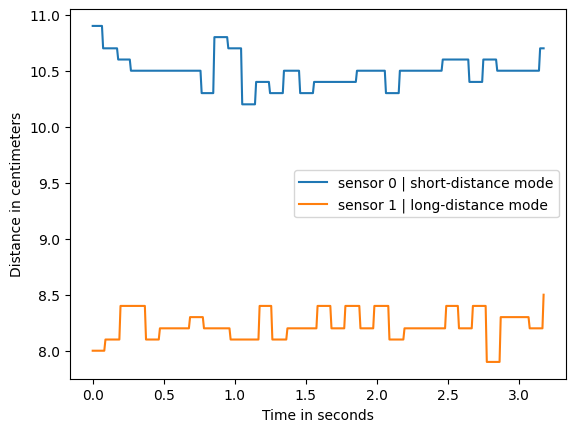

In [33]:
tof0_N = len(tof0)
tof1_N = len(tof1)

# Time domain figure
tof0_time = np.linspace(0., (tof0_timestamp[-1] - tof0_timestamp[0]), num=tof0_N)
tof1_time = np.linspace(0., (tof1_timestamp[-1] - tof1_timestamp[0]), num=tof1_N)
plt.plot(tof0_time, tof0, label='sensor 0 | short-distance mode')
plt.plot(tof1_time, tof1, label='sensor 1 | long-distance mode')
plt.legend()
plt.title('')
plt.xlabel('Time in seconds')
plt.ylabel('Distance in centimeters')
plt.show()

In [39]:
print(np.mean(tof0[0:99]), np.mean(tof1[0:99]))

35.697979797979805 38.85656565656566


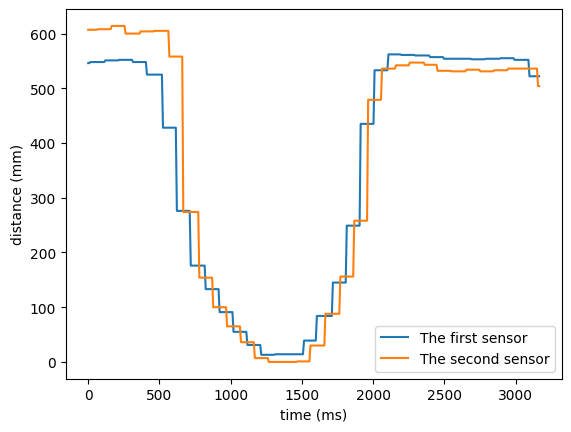

In [17]:
tof0_N = len(tof0)
tof1_N = len(tof1)

# Time domain figure
tof0_time = np.linspace(0., 1000*(tof0_timestamp[-1] - tof0_timestamp[0]), num=tof0_N)
tof1_time = np.linspace(0., 1000*(tof1_timestamp[-1] - tof1_timestamp[0]), num=tof1_N)
tof0_ = [i * 10 for i in tof0]
tof1_ = [i * 10 for i in tof1]
plt.plot(tof0_time, tof0_, label='The first sensor')
plt.plot(tof1_time, tof1_, label='The second sensor')
plt.legend()
plt.title('')
plt.xlabel('time (ms)')
plt.ylabel('distance (mm)')
plt.show()

In [10]:
tof0_N

7150